## Business Case:-Based on given features we need to find whether an employee will leave the company or not.

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Loading the data
data=pd.read_csv('HR-Employee-Attrition.csv')

## Basic Checks

In [ ]:
data.shape

(1470, 35)

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
num_data=data.select_dtypes(include=["float64","int64"])
print("numerical colums",num_data.columns)


numerical colums Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
cat_data=data.select_dtypes(include=["O"])
print("categorical colums",cat_data.columns)

categorical colums Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [ ]:
for i in cat_data.drop("Attrition",axis=1):
    print(i,data[i].unique())
    print(data[i].value_counts())
    print("**********************")

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
**********************
Department ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
**********************
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
**********************
Gender ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
**********************
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Hum

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
data.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# we do not have any null values
# we have 2 constant features Employee count and standardhours
# Over18 is constant feature.

## Exploratory Data Analysis

# Univariant Analysis

In [ ]:
## Univariate Analysis
!pip install sweetviz#installing sweetviz library`

In [ ]:
import sweetviz as sv#importing sweetviz library
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

## Insights from univariant analysis
* People between the age group 25-40 are the majority.
* 70% of the people travel raraely, 20% travel frequently rest do not travel.
* More than 70% of the employees belong to research and development.
* Almost 50% of the people are nearer to the office i.e the distance from their home is lesser than or equal to 10.
* More than 60% of the people have educational qualification of 4 and 5.
* Majority(40%) of the people are from life science field and 30% are from medical field.
* 60% of the people are almost satisfied with environment condition of the office with more than 3 ratings.
* Gender count: 60% male 40% female.
* 60% of the people have partial involvement in job and 20% have good involvement.
* More than 60% employees seem to be satisfied with their job.
* 50% of the people are married, 30% single and the rest are divorced.
* 60% of the people have less thanm 10k income.
* 40% of the people have worked for less than 1 company which implies they are freshers.
* 30% of the people have worked for more than 5 companies.
* 80% of the people have average work rating.
* 60% of the people have worked for the same company only for 5 years or lesser.
* 80% of the people own only 1 or 0 stock at the company.

# Bivaraite Analysis

## Checking relationship of all variables with respect to target variable

In [ ]:
data.info()

In [ ]:
## Create a new dataframe with categorical variables
data1=data[['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']]

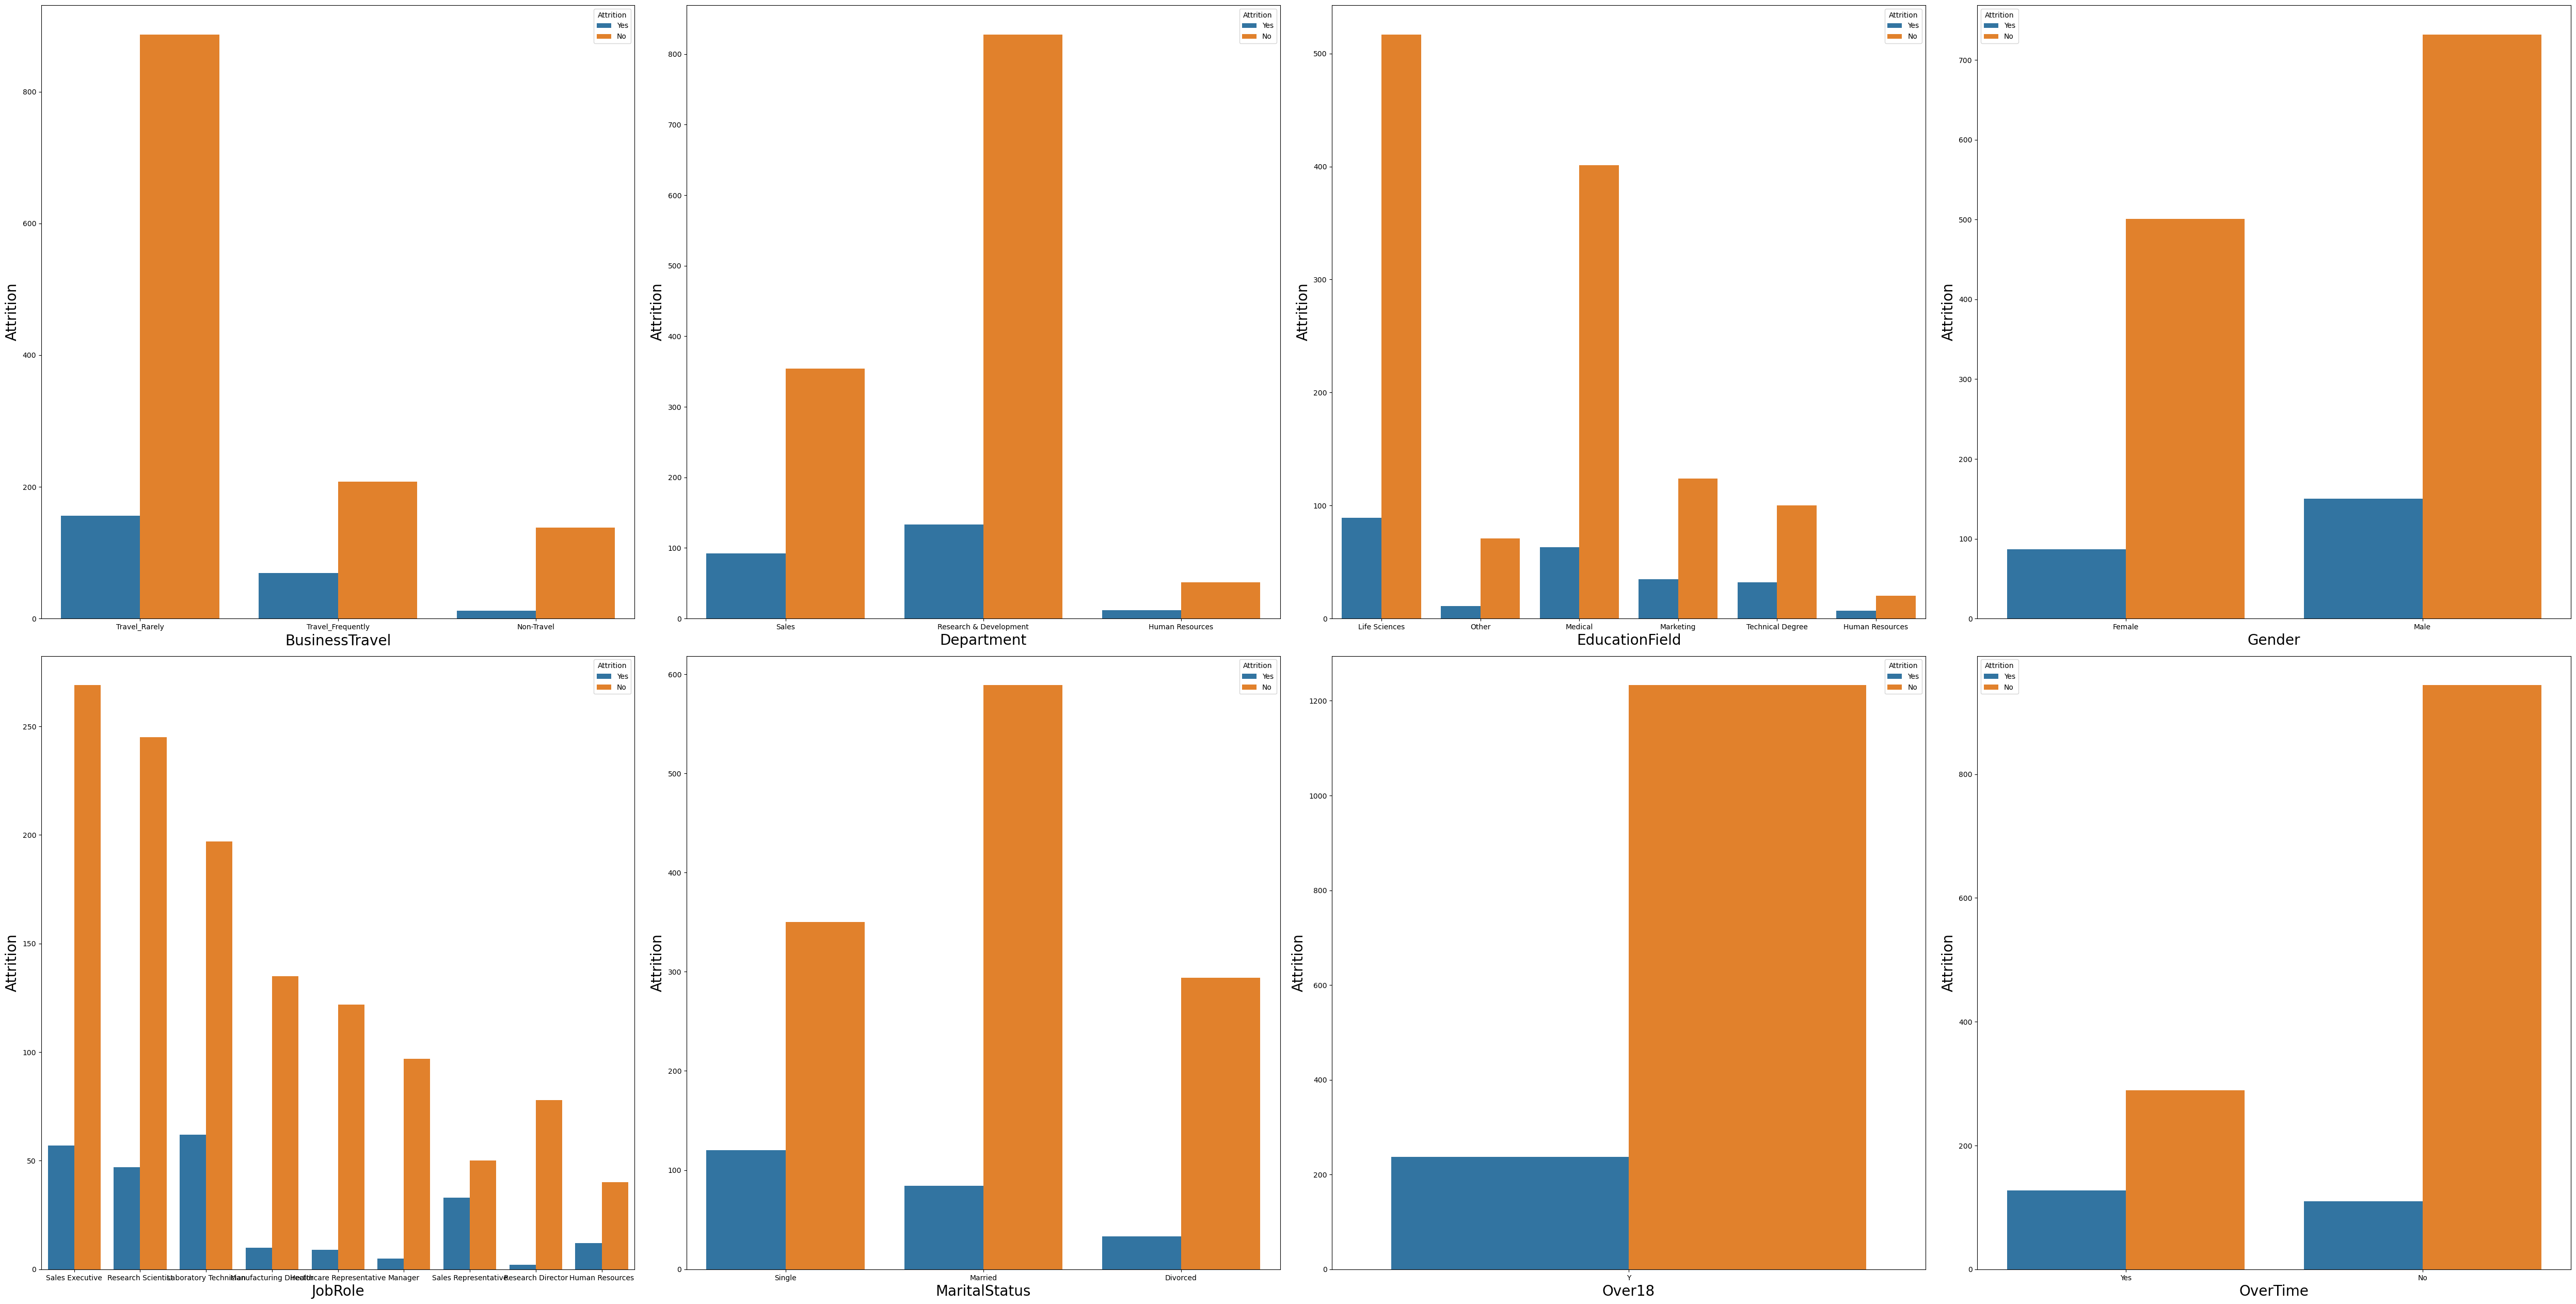

In [ ]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(50,50), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in data1:#for loop to acess columns form data1
    if plotnumber<=16 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=data1[column]           #plotting count plot
                        ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)#assigning name to x-axis and increasing it's font
        plt.ylabel('Attrition',fontsize=20)#assigning name to y-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()

## Insights from bivariant analysis
* More male employees are expected to quit their job.
* People who travel more are more expected to leave the job.
* People who do not do overtime do not leave the job.
* Singles are expected to quit the job.
* People from life science and mediacl field are more probablyu leaving their job.

##  Discrete data

In [ ]:
data3=data[['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']]#discrete columns

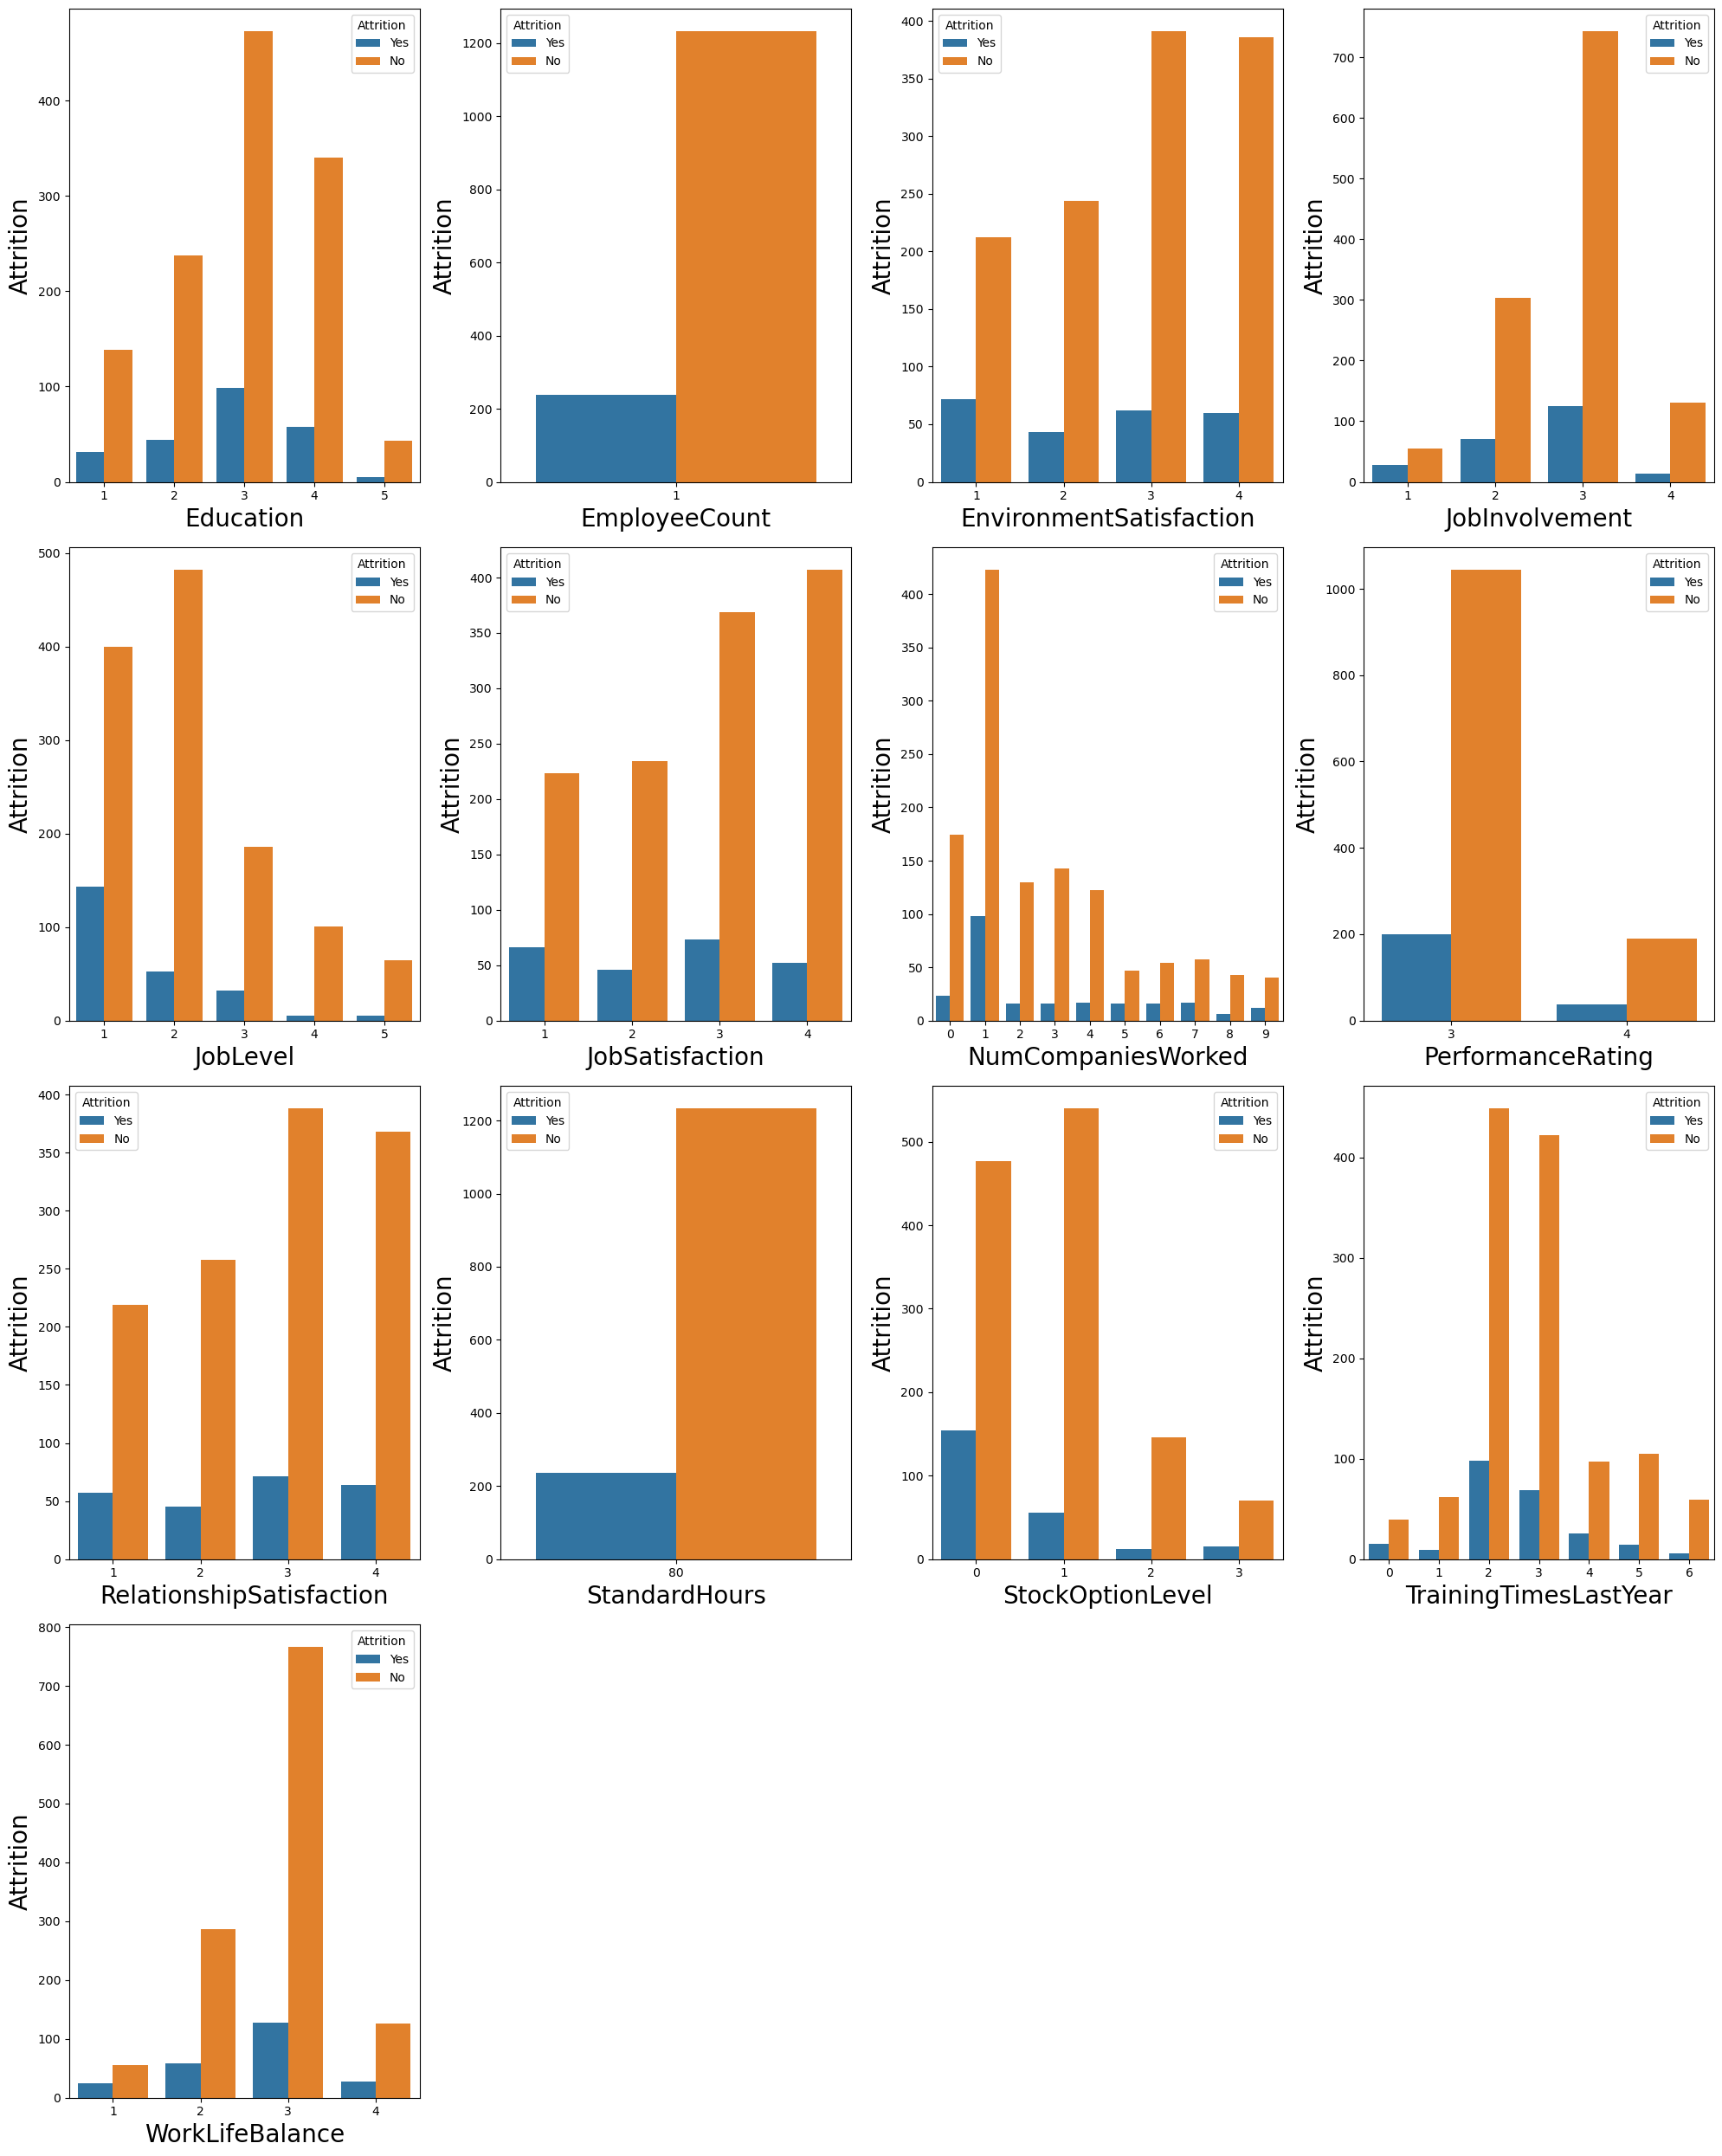

In [ ]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1

for column in data3:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data3[column]
                        ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# Task:-Get the insights from discrete columns.

### Bivariant analysis of continuous variables

In [ ]:
data2=data[['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]#continuous variables/columns

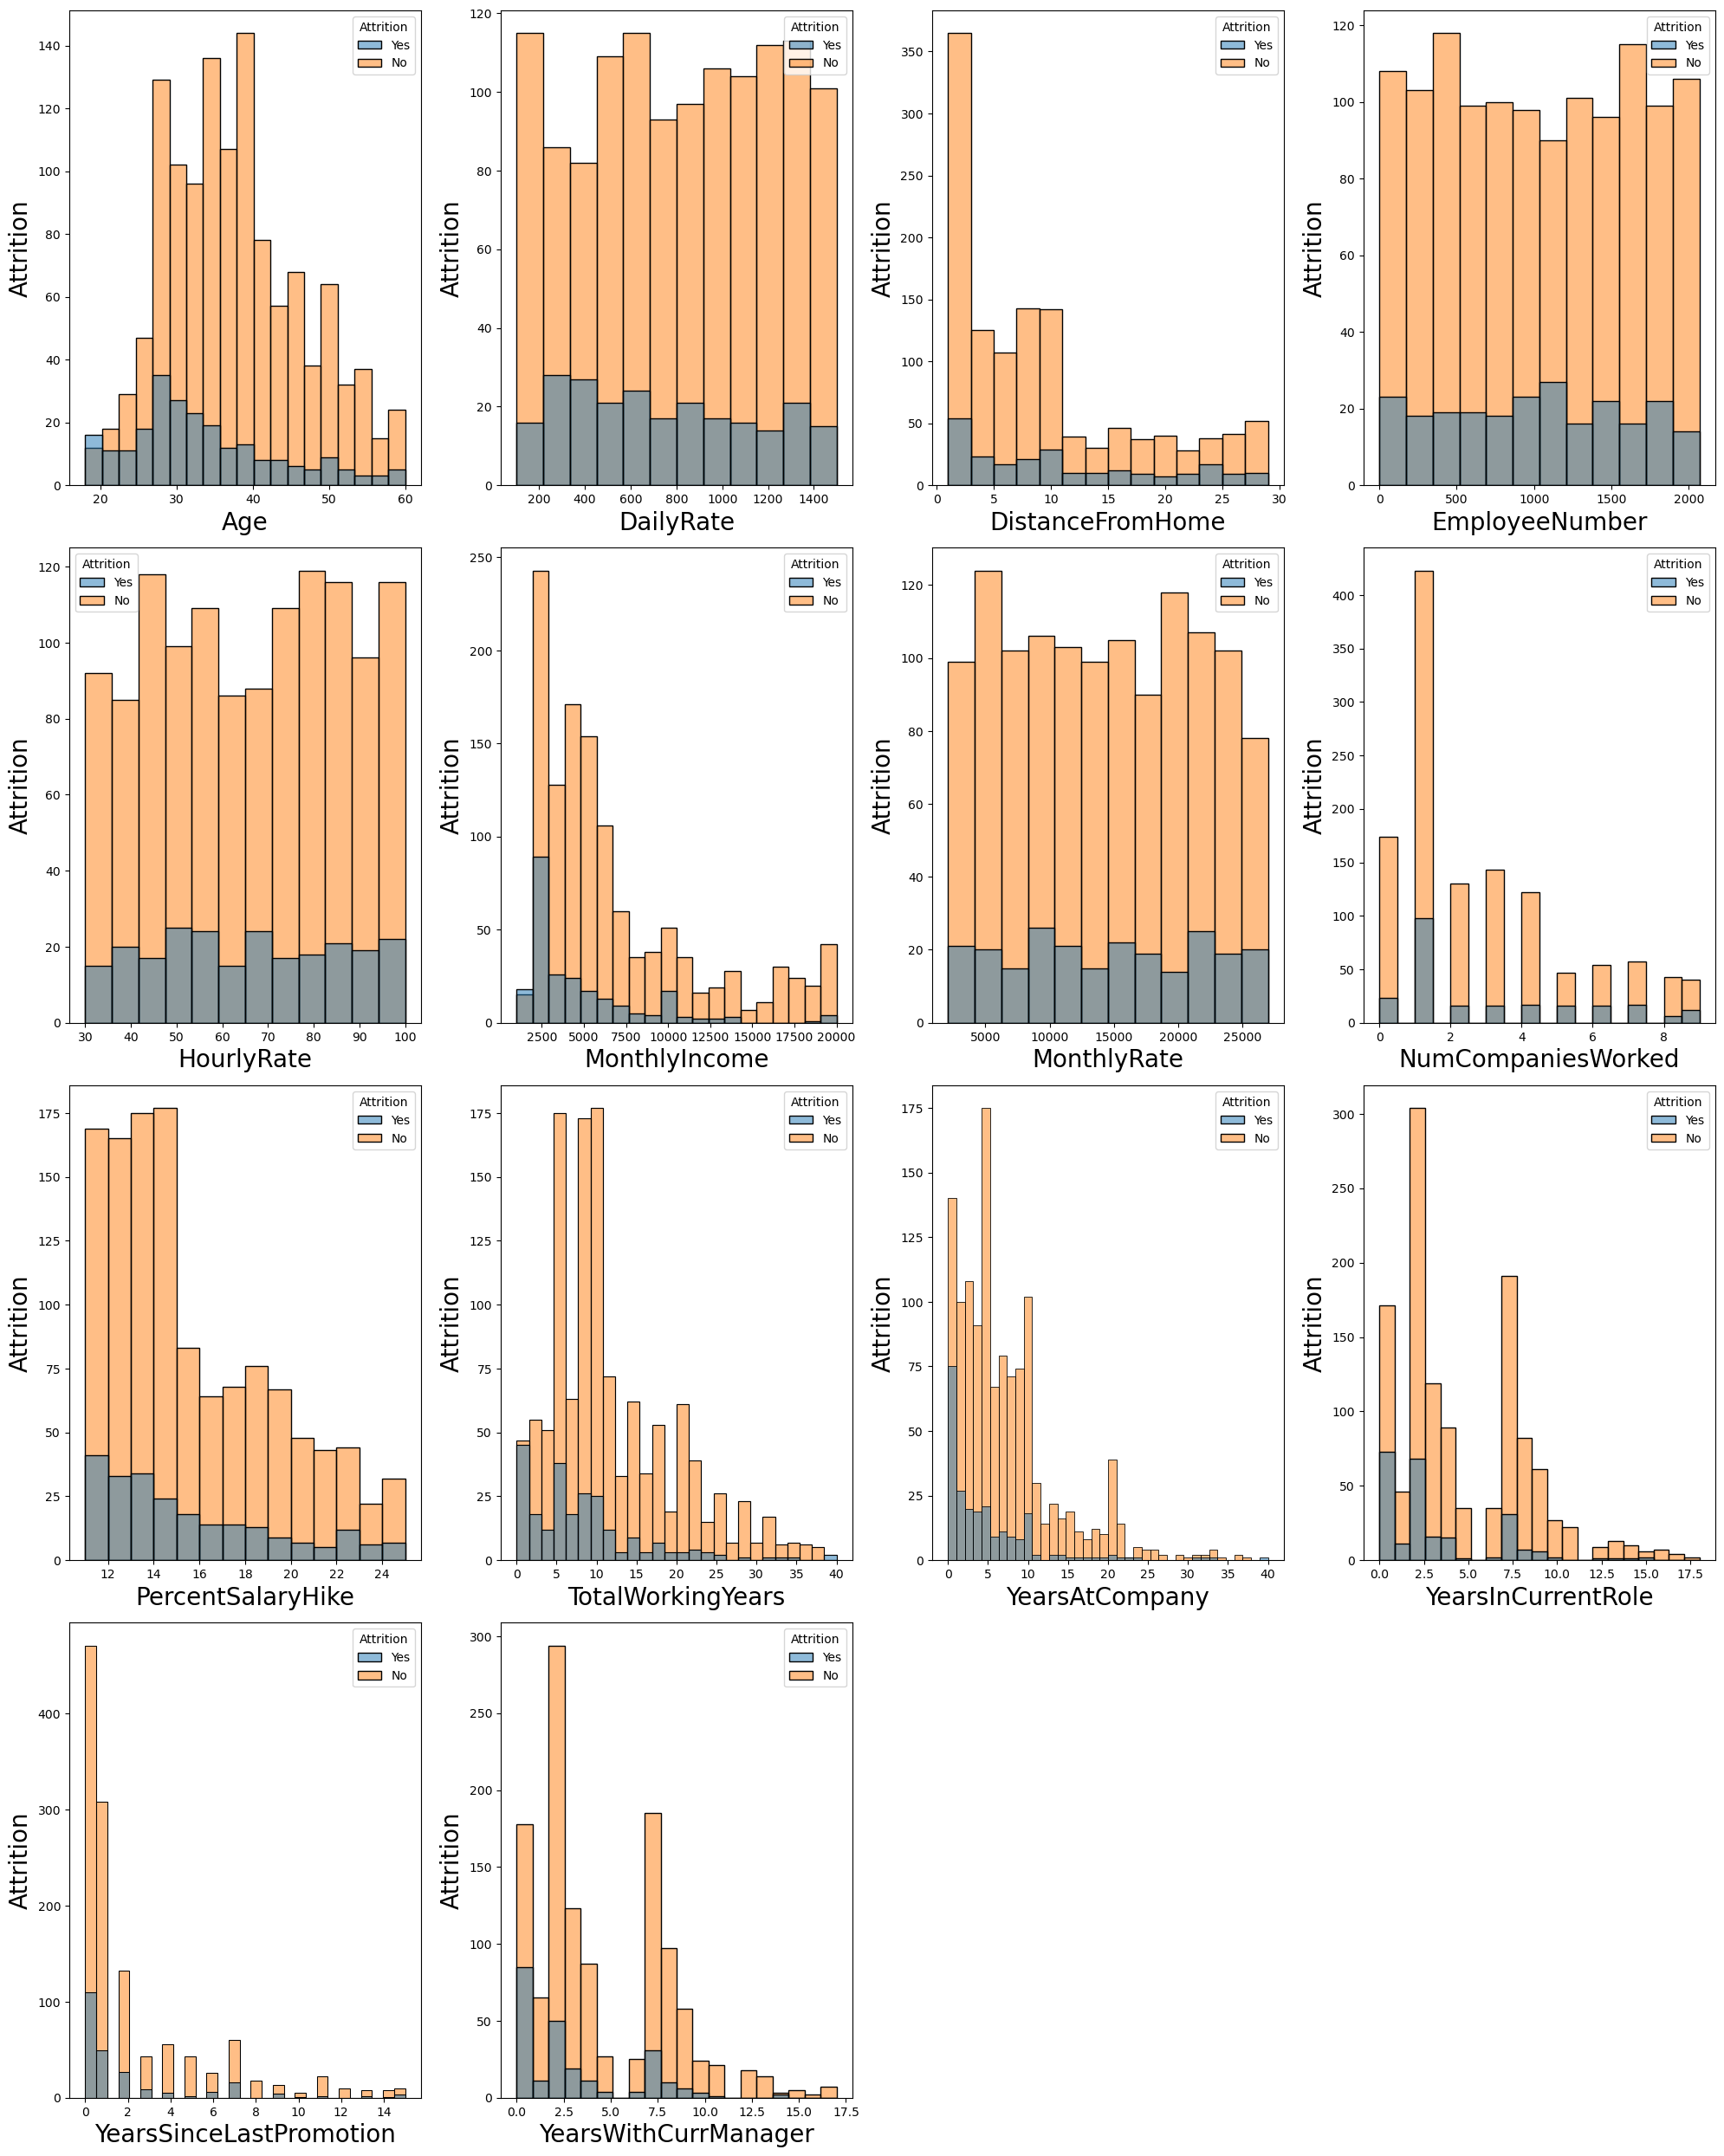

In [ ]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in data2:#acessing columns form data2 DataFrame
    if plotnumber<=16 :#checking whether counter is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=data2[column]          # plotting hist plot and dropping null values,classification according to target
                        ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font
        plt.ylabel('Attrition',fontsize=20)#assigning name to y-axis and increasing it's font
    plotnumber+=1#increasing counter by 1
plt.tight_layout()

In [ ]:
# Task:-Get insights from continous variables.

## Final conclusions
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : Attrition rate is almost equal

# Data Preprocessing

## Checking missing values/null values

In [ ]:
data.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Conversion of  Categorical variables

###  1.Attrition

In [ ]:
data.Attrition.unique()#checking unique value in Attrition column

array(['Yes', 'No'], dtype=object)

In [ ]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [3]:
## Manual encoding Attrition feature
data.Attrition=data.Attrition.map({'Yes':1,'No':0})
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


###  2.BusinessTravel

In [ ]:
data.BusinessTravel.unique()#checking unique value

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

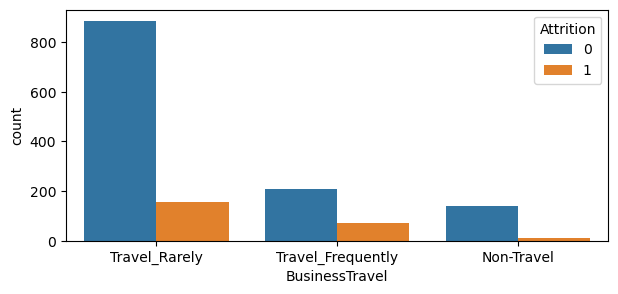

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='BusinessTravel',hue='Attrition')

In [4]:
data.BusinessTravel=data.BusinessTravel.map({'Travel_Frequently':1,'Travel_Rarely':2,'Non-Travel':0})

In [5]:
data.head()#checking whether imputation properly done or not

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 3.Department

In [ ]:
data.Department.unique()#unique values

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

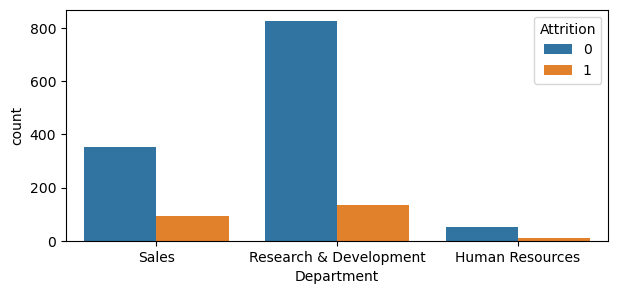

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='Department',hue='Attrition')

In [6]:
data.Department=data.Department.map({'Research & Development':2,'Sales':1,'Human Resources':0})#imputation using map function


In [7]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,1,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,2,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,2,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,2,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,2,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 4.EducationField

In [ ]:
 data.EducationField.unique()#unique labels

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
 data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

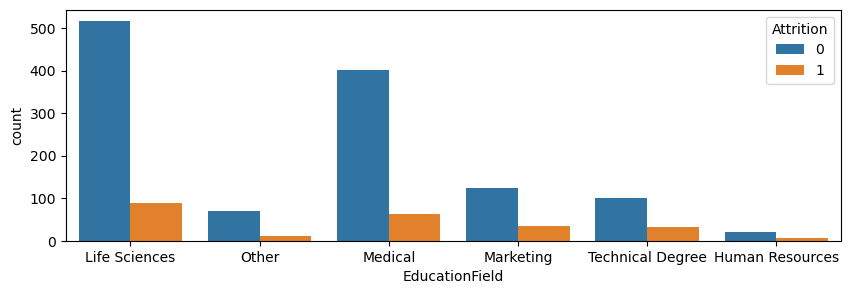

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=data,x='EducationField',hue='Attrition')

In [8]:
#using map function
data.EducationField=data.EducationField.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0 })



In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,1,1,2,5,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,2,8,1,5,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,2,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,2,3,4,5,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,2,2,1,4,1,7,...,4,80,1,6,3,3,2,2,2,2


### 5.Gender

In [ ]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data.Gender.value_counts()#checking weightage of each label whoever have high count

Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

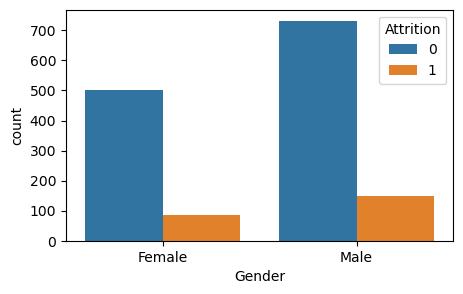

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=data,x='Gender',hue='Attrition')

In [10]:
## Encoding Gender by one hot encoding.
data.Gender=pd.get_dummies(data.Gender,drop_first=True)

### JobRole

In [ ]:
data.JobRole.value_counts()#checking count for each label

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

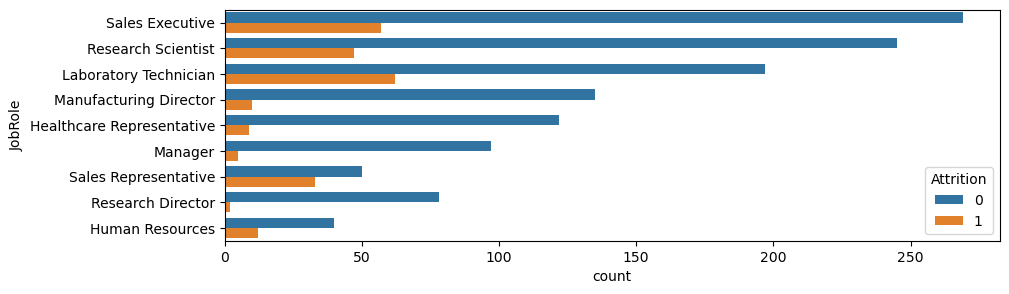

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=data,y='JobRole',hue='Attrition')
plt.show()

In [11]:
## Encoding JobRole
data.JobRole=data.JobRole.map({'Laboratory Technician':8,'Sales Executive':7,'Research Scientist':6,'Sales Representative':5,
                              'Human Resources':4,'Manufacturing Director':3,'Healthcare Representative':2,'Manager':1,'Research Director':0 })




### Encoding MaritalStatus using label encoding


In [ ]:
data.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

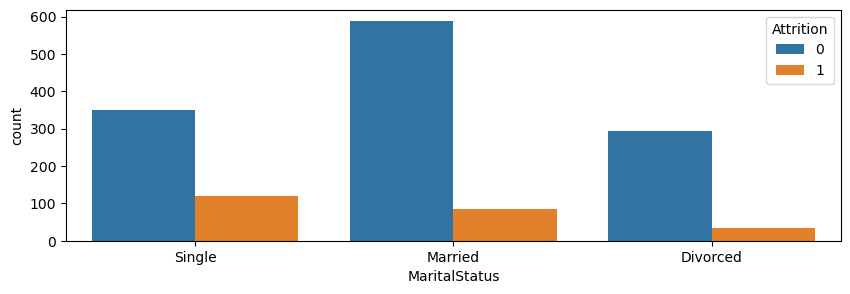

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=data,x='MaritalStatus',hue='Attrition')


In [12]:
## Encoding MaritalStatus

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn

label = LabelEncoder()#object creation
data.MaritalStatus=label.fit_transform(data.MaritalStatus)#applying label encoder to  marital status

### OverTime

In [ ]:
data.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

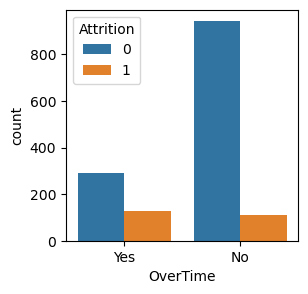

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=data,x='OverTime',hue='Attrition')


In [13]:
## Encoding OverTime
data.OverTime=label.fit_transform(data.OverTime)#label encoding

In [ ]:
# Since we are using DT and DT is robust to outliers and doesnot require scaling.
# Only conversion of categorical data and missing values should be handled.

## Feature Selection

<AxesSubplot:>

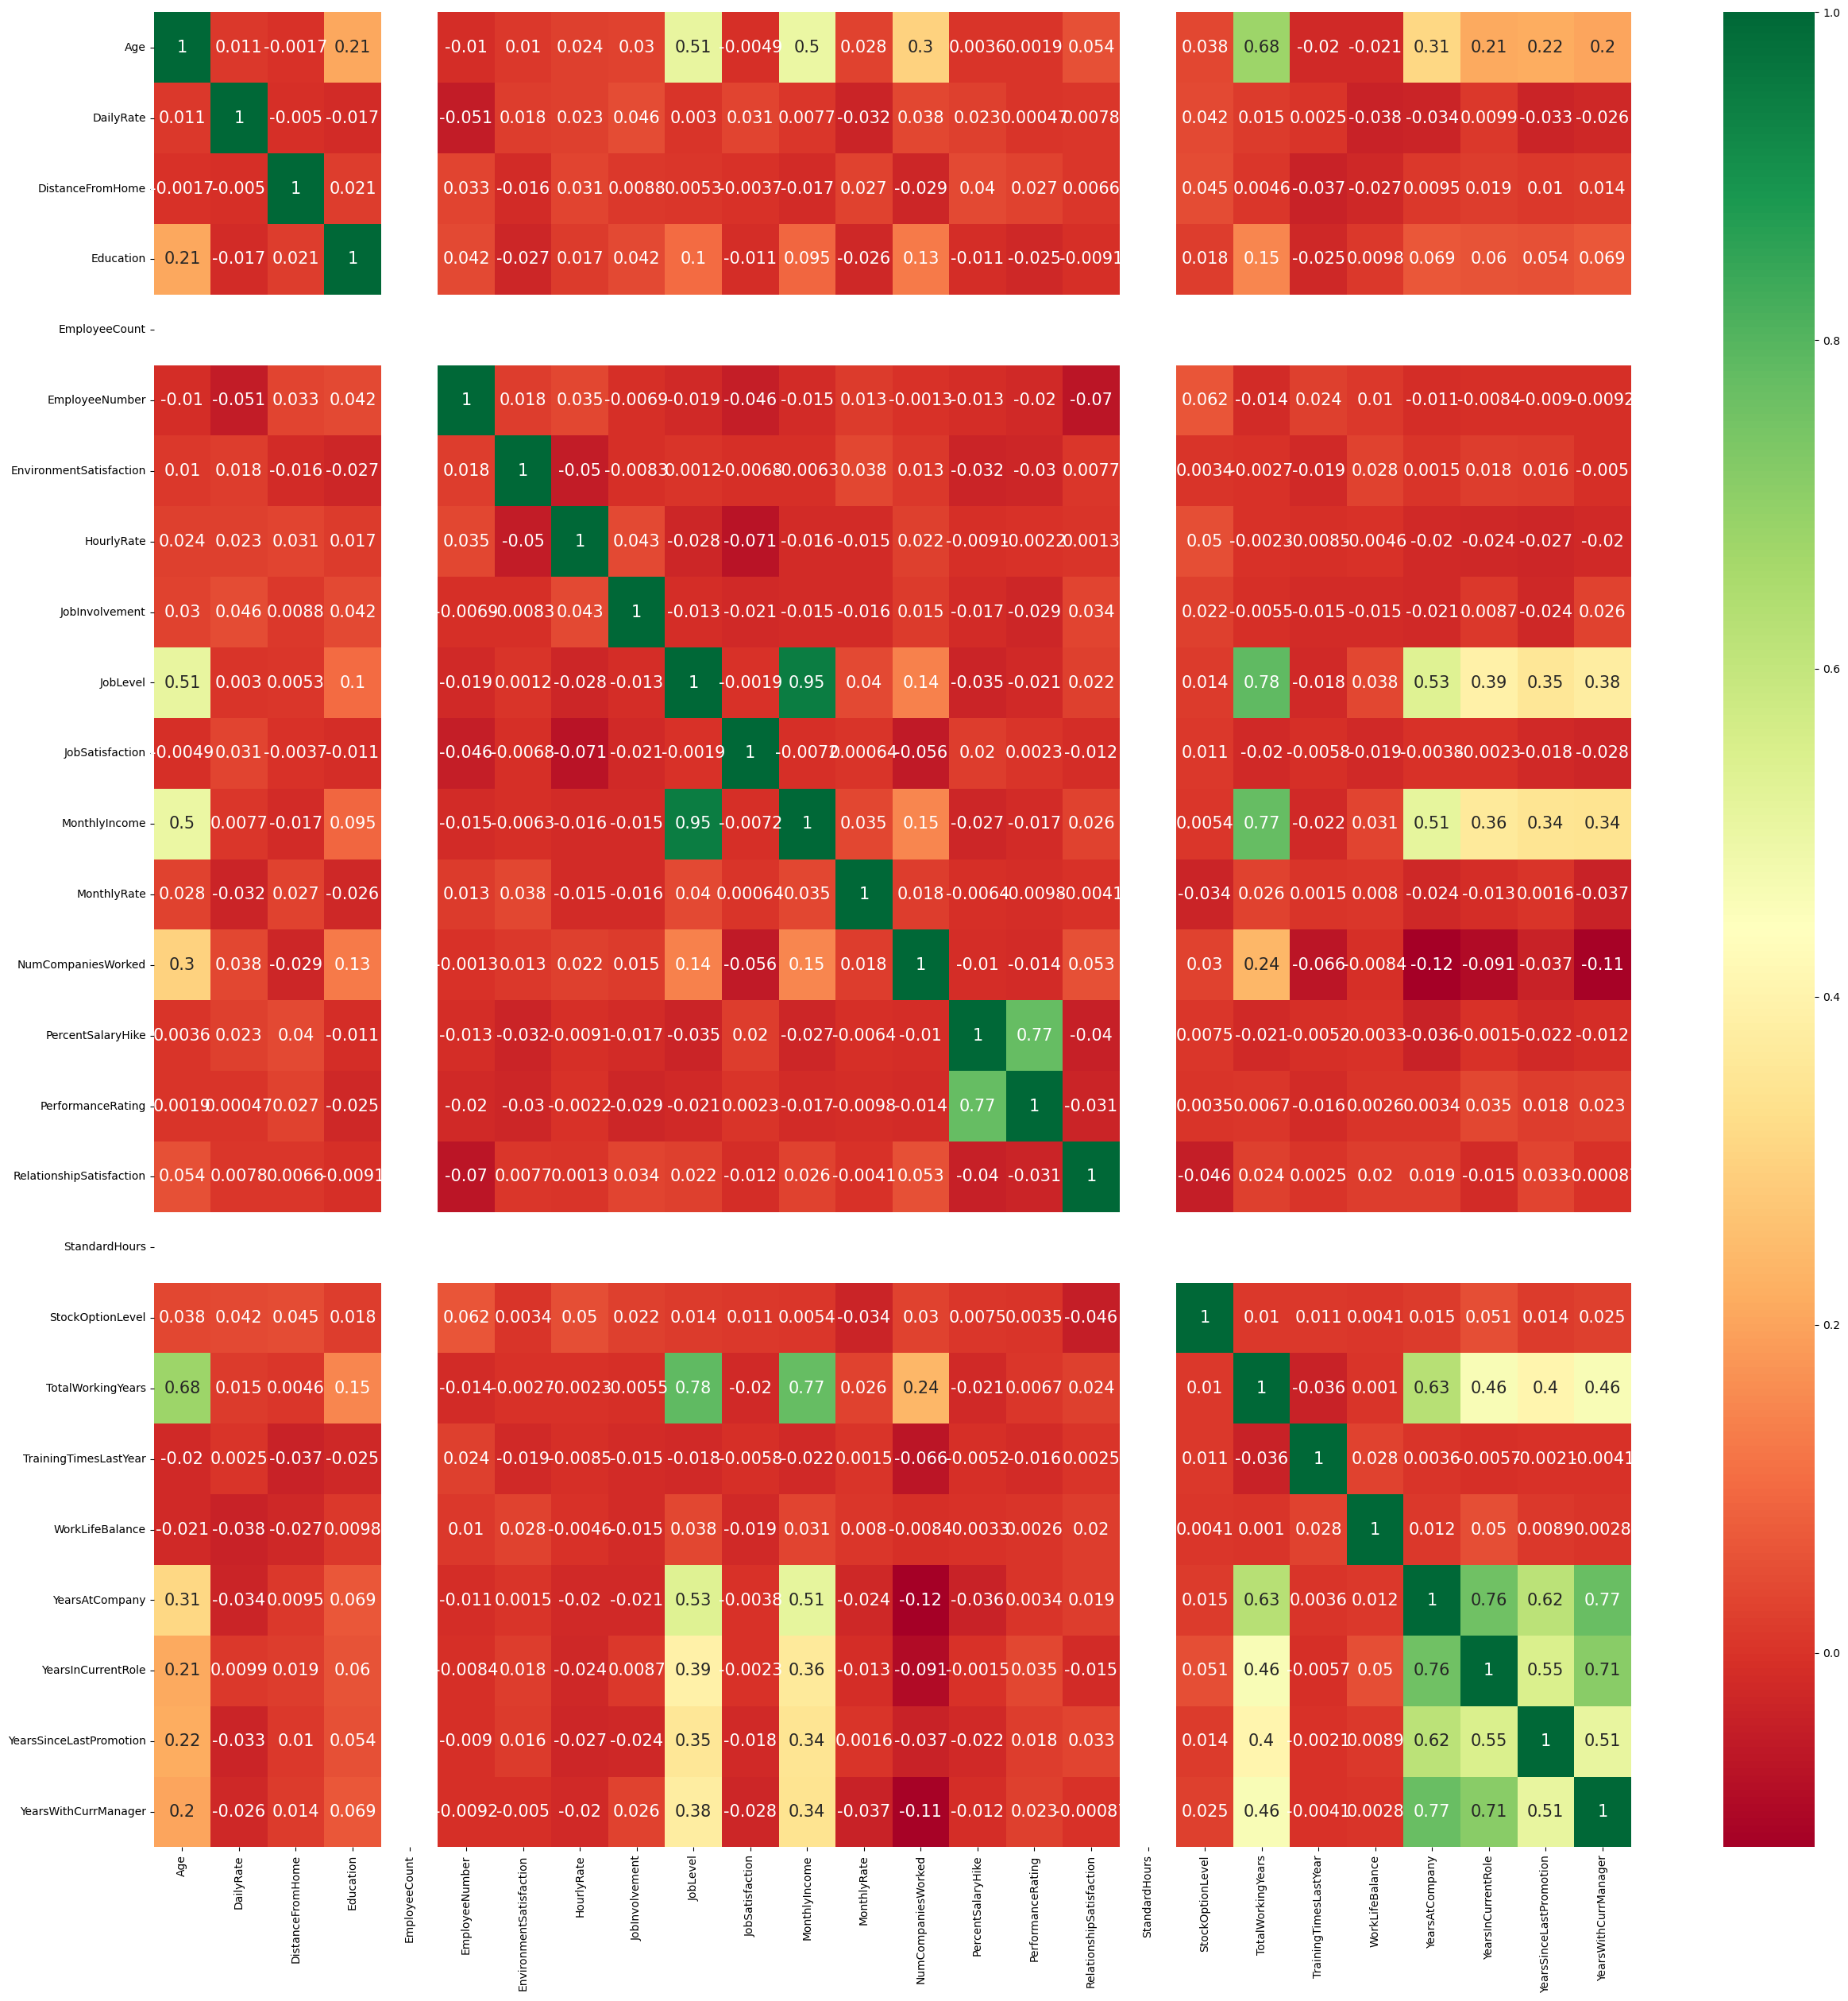

In [ ]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(num_data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [14]:
## Removing constant features
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)#droping those columns which have std=0

In [ ]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.610884,9.192517,2.912925,3.883673,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.568893,8.106864,1.024165,1.289616,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,3.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,2.000000,7.000000,3.000000,4.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,5.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Model Creation

In [15]:
## Split data into x and y
x = data.drop('Attrition', axis=1)
y = data.Attrition

In [16]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [17]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [18]:
print("actual",Counter(y_train))
print("after smote",Counter(y_smote))

actual Counter({0: 978, 1: 198})
after smote Counter({0: 978, 1: 978})


In [19]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [21]:
y_train_predict=model.predict(x_train)#predicting training data to check training performance
y_train_predict

array([0, 0, 0, ..., 1, 0, 0])

In [22]:
# training accuracy
from sklearn.metrics import accuracy_score,classification_report,f1_score
accuracy_score(y_train,y_train_predict)

1.0

In [23]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.7789115646258503

# Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

In [ ]:

tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_smote,y_smote)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

In [ ]:
tree_cv.best_score_

In [ ]:
model=DecisionTreeClassifier(criterion='gini',max_depth=14,min_samples_leaf= 1,min_samples_split=3,splitter='best')
model.fit(x_smote,y_smote)#training the model
y_pred=model.predict(x_test)#prediction
y_pred#predicted values

In [ ]:
y_train_predict=model.predict(x_smote)#predicting training data to check training performance
y_train_predict

In [ ]:
# Testing accuracy
accuracy_score(y_test,y_pred)

In [ ]:
# Training score
accuracy_score(y_smote,y_train_predict)

# Random Forest

In [24]:
#importinng the algo
from sklearn.ensemble import RandomForestClassifier

#initialise
model = RandomForestClassifier()

#training the model
model.fit(x_smote,y_smote)

#prediction
y_pred = model.predict(x_test)

Evaluating the model

In [25]:
accuracy_score(y_test,y_pred) # testing accuracy

0.8673469387755102

Hyperparamaters

In [27]:
#linspace ---> linearspace --> linearly spaced values --?
#distance Between all data points distance is asame
#linspace(start,stop,number of values)
#np.linspace(start=200, stop=2000, num=10)
[int(x) for x in np.linspace(start=200, stop=2000, num=10)]

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [28]:
from sklearn.model_selection import RandomizedSearchCV

#number of estimators, no of decision tree = []
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

#auto -- randomly selecting one  sqrt --square root of features
max_features = ['auto', 'sqrt']

#max_depth --->height of the tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]

max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

#sampling -- is it with replacement or without
bootstrap = [True, False]




In [29]:
#dictionary for hyperparameters

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")


Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: ignored

In [30]:
rf_clf2 = RandomForestClassifier(n_estimators= 1000, min_samples_split=2, min_samples_leaf= 1, max_features='auto', max_depth=50, bootstrap=False)#passing best parameter to randomforest
rf_clf2.fit(x_smote,y_smote)
y_predict=rf_clf2.predict(x_test)


In [31]:
# training accuracy
y_train_pred=rf_clf2.predict(x_train)

In [32]:
# testing accuracy
accuracy_score(y_test,y_predict)

0.8775510204081632

In [33]:
# training accuracy
accuracy_score(y_train,y_train_pred)

1.0